# The steps of machine learning

### Introduction

In the last lesson, we described a machine learning problem as one that discovers an unknown procedure.  But how does a machine learning program do this?  That's what we'll learn in this lesson.

Why don't we just tell you.

A machine learning algorithm:

1. uses **data** 
2. to find the parameters of a **hypothesis function**
3. that minimize the output of our **loss function**
4. by using an **optimization procedure**

Let's review each of these components in turn, starting with the data.

### 1. Gather the data


Whenever we are faced with a machine learning algorithm, our first step is to gather data related to the outcome we are trying to predict.  For example, if we run a clothing store, it could be how many T-shirts will be sold in the next month.  For the purpose of keeping our model simple, let's assume that the only factor to consider is the amount spent on advertising these T-shirts.  For now, let's call this factor of advertising, our input.   

The other component that we'll look at are the *answers* - that is, we'll look at the related monthly sales for each advertising campaign.

> Caveat: We only look at the *answers* in *supervised* (as opposed to unsupervised) machine learning problems.  But it's ok to ignore that distinction for now.  Supervised learning is the main type of machine learning we will explore in this course, and we'll explain the distinction further down the line.

This is our data of the inputs and the related outputs of our past data.

| spending        | t-shirts           
| ------------- |:-------------:| 
|    2000        |380  | 
|    3500        |445 | 
|    4000      | 490 | 

We'll call this data our **training data**.

The first step of in machine learning is to gather our training data.  

> Our **training data** is a set of previous examples or observations, almost like a series of experiments.  

Our training data includes: 

1. Potential inputs to what we are trying to predict, and 
2. The past outcomes associated with these different inputs

| input        | output           
| ------------- |:-------------:| 
|    past input 1        | past outcome 1 | 
|    past input 2        | past outcome 2 | 

We call each row of our data an **observation**.  So the first row of our `spending` `t-shirts` chart contains our first *observation*, where we observed a spending of $2000$ and sales of $380$.

The official term for our inputs is called our **features**.  So here, ad spending is our only **feature**, as it is the only input that our model is considering.  And the official name of our output is our **target**.  The target is what we are trying to predict.  Here, we are trying to predict number of t-shirts sold.  

>* **Features**: the input columns that we use to predict the target
>* **Target**: the column with the data we are trying to predict.  
>* **Observation**: an entire row of data

### 2. Find a hypothesis function

#### A. Start with an initial hypothesis

Now that we have our training data, which contains our feature of ad spending and our target of sales, let's look to see if there is some association between this feature and our target.  We can plot our data to help us out.  We'll place `advertising spending` on the horizontal axis, our *x-axis*, and `T-shirt sales` on the vertical axis, our *y-axis*.

Ok, time to plot.  We'll use the `plotly` library to do so.

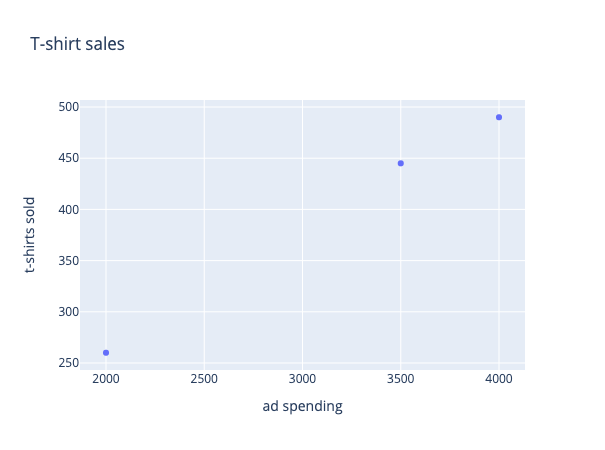

In [22]:
import plotly.graph_objects as go
ad_spends = [2000, 3500, 4000]
sales = [260, 445, 490]
scatter_data = go.Scatter(x=ad_spends, y=sales, name = 'actual sales', mode='markers')
layout = go.Layout(title = 'T-shirt sales', xaxis={'title': 'ad spending'}, yaxis = {'title': 't-shirts sold'})
go.Figure(data = [scatter_data], layout = layout)

So looking at the input data of ad spending and the outputs of the sales, there does appear to be an association between the two.  Let's come up with a hypothesis function.  

> Our **hypothesis function** takes in inputs of our training data, and *comes close* to returning the observed outputs. 

Now normally we'll use a computer program to create a hypothesis function.  But, for now, let's just guess the relationship and write it down.  Here's our guess:

$$ tshirts\_sold =.15∗ad\_spend $$

#### B. Evaluate that hypothesis function

Now we always start with a hypothesis function that is just a random guess.  And, later, we'll improve upon this guess.  But first we need to evaluate this hypothesis function.

To tell whether this hypothesis function is any good, we look at how the hypothesis function performs against the training data from our table.

We do this by comparing what the predictions of our model to what we actually observed.  And we get the predictions of our model, by inputting our `ad_spend` amounts into our hypothesis function.  We'll add this to a column next to the actual sales results.

| spending        | actual t-shirt sales | expected t-shirt sales           
| ------------- |:-------------:| :-------------:| 
|    2000        |260  | 300  | 
|    3500        |445 | 525 | 
|    4000      | 490 | 600 | 

And we can plot the predictions of our hypothesis function alongside our actual data.

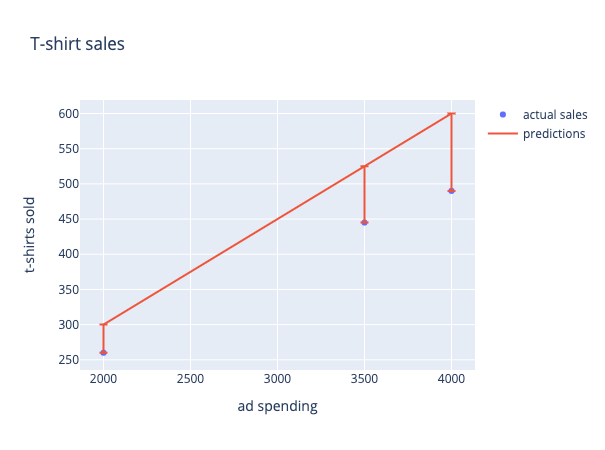

In [20]:

predictions = list(map(lambda input: .15*input,ad_spends))

errors = [40, 80, 110]
predictions_trace = go.Scatter(x=ad_spends, y=predictions, mode = 'lines', name = 'predictions', error_y = dict(
            type='data',
            symmetric=False,
            array=[0, 0, 0, 0],
            arrayminus=errors
        ))

go.Figure(data = [scatter_data, predictions_trace], layout = layout)

Let's break down the plot above.  The long red line represents the predictions of our hypothesis function.  Given ad spending of $2000$, it uses the hypothesis function 

$tshirts\_sold =.15∗ad\_spend  = 300$,

and predicts T-shirt sales of 40.  

The blue dots represent the actual T-shirts sales that were observed.  And the red vertical lines represent the difference between what the hypothesis function predicted and the actual sales.

Now remember that our goal in machine learning is to find a hypothesis function such that the outputs from our hypothesis function come *close* to our actual outputs.  Each red line represents how far away we were. Now, our task is to get our hypothesis function closer to the observed outputs.  Here's how.

### 3. Use a loss function

#### Introducing the loss function

Before getting our hypothesis function closer to our observations, we first quantify just how far away our hypothesis function is.  This way we can at least get a sense of how good or bad we are performing.

We quantify how good or bad we are doing simply by using an error metric, and then summing together the error at each observed result.  This sum is called our **loss function**.

| spending        | actual t-shirt sales | expected t-shirt sales | actual - expected|
| ------------- |:-------------:| :-------------:| :-------------:| 
|    2000        |380           | 300                               | -40 |
|    3500        |445           | 525                               | -80 | 
|    4000      | 490            | 600                              |  -110 |

Above our $loss = -40 + -80 + -110 = -230$.

> Remember that this is the loss specific to the hypothesis function of $ sales =.15∗ad\_spend $.  We'll update this loss function in the future as well, but for now just adding up our errors works fine.

#### Use an optimization procedure to minimize the loss functoin

Now our goal is to make the result of our loss function as close to zero as possible, so we need a way to minimize our loss function.  

The way that we can do that is by finding the parameter -- above .15 is our parameter -- that minimizes our loss function.  And we use an **optimization procedure** to find the parameters that minimize our loss function.  There are different optimization procedures depending on the specific machine learning tool that we use - but here, we can just do trial and error.

Below, plug in different values, for the `parameter` to minimize the total error.

total error is -230.0


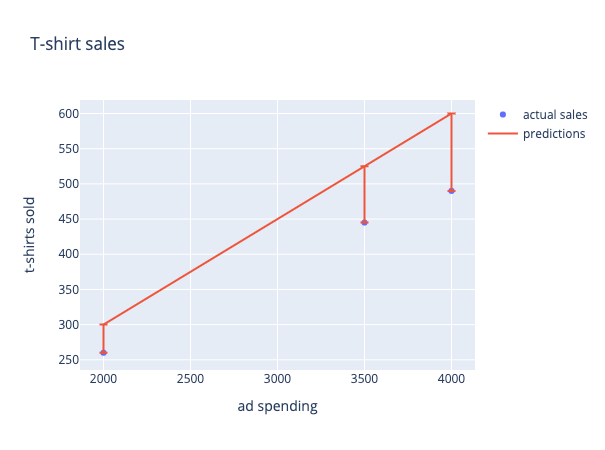

In [39]:
parameter = .15
# change the parameter value above


def hypoth_fn(parameter, ad_spend): 
    return parameter*ad_spend

ad_spends, sales_nums = ([2000, 3500, 4000], [260, 445, 490])

predictions = [hypoth_fn(parameter, ad_spend) for ad_spend in ad_spends]
errors = [sales_num - predicted for sales_num, predicted in list(zip(sales_nums, predictions))]

predictions_trace = go.Scatter(x=ad_spends, y=predictions, mode = 'lines', name = 'predictions',
                               error_y = dict(type='data', symmetric=False, array=errors))

total_error = sum(errors)
print(f'total error is {total_error}')
go.Figure(data = [scatter_data, predictions_trace], layout = layout)

### That's it

Those are the steps to how machine learning finds the how inputs to a function lead to a specific output.  

We saw that we start with our training data, then use an initial hypothesis function, evaluate the hypothesis function with our loss function, and then can try different parameters to decrease the output of our loss function.  

So, our machine learning algorithm: 
> uses data to find the parameters of a hypothesis function such that it minimizes the output of our loss function.  

Or to put it in terms of our graph above and formula $   t\_shirts=.15∗ad\_spend $, our algorithm changes the line such that it predicts outcomes that are as close as possible to the actual observed sales.  

We also defined some terms for our data.  For example, we called each row of our data an *observation*.  And we divided the columns of our data into features and a target.  The target is the data that we are trying to predict.  And the feature is what helps us to predict the target.  Next up, it's time to start using a machine learning algorithm. 